In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load Titanic dataset
df = pd.read_csv('titanic.csv')

# Select two features and target for simplicity
df = df[['Fare', 'Age', 'Survived']].dropna()
X = df[['Fare', 'Age']].values
y = df['Survived'].values.reshape(-1, 1)  # reshape for matrix ops

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-10  # prevent log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))


In [4]:
# Initialize weights and bias
np.random.seed(42)
weights = np.random.randn(2, 1)
bias = 0
lr = 0.1
losses = []

# Training loop
for i in range(100):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    
    # Loss
    loss = binary_cross_entropy(y_train, y_pred)
    losses.append(loss)
    
    # Gradients
    dz = y_pred - y_train
    dw = np.dot(X_train.T, dz) / X_train.shape[0]
    db = np.mean(dz)
    
    # Update
    weights -= lr * dw
    bias -= lr * db


In [5]:
# Predict on test set
test_preds = sigmoid(np.dot(X_test, weights) + bias)
test_preds_class = (test_preds > 0.5).astype(int)

# Accuracy
accuracy = np.mean(test_preds_class == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.62


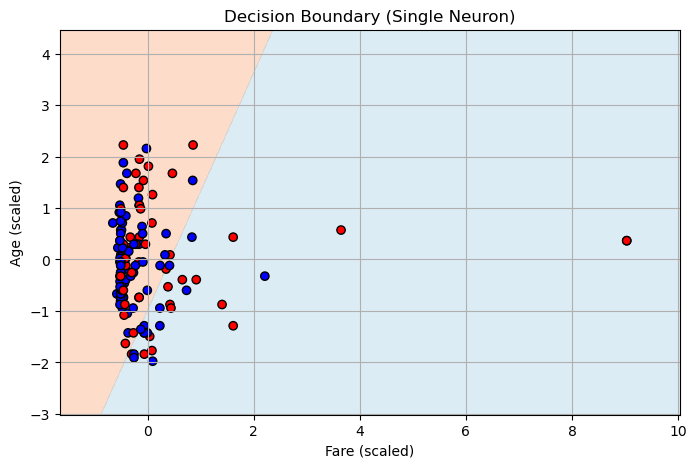

In [6]:
# Plot decision boundary (for 2D)
x_min, x_max = X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1
y_min, y_max = X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = sigmoid(np.dot(grid, weights) + bias).reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], alpha=0.3, cmap='RdYlBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test.flatten(), cmap='bwr', edgecolors='k')
plt.title("Decision Boundary (Single Neuron)")
plt.xlabel("Fare (scaled)")
plt.ylabel("Age (scaled)")
plt.grid(True)
plt.show()

A single neuron can perform linear classification effectively on linearly separable data.

But here’s why it’s limited:
- Can't handle complex, nonlinear relationships.
- Lacks layers and non-linearities for deep feature extraction.
- Overfits/underfits easily with real-world datasets.
- Poor generalization without regularization or deeper structure.

Neural networks with hidden layers and non-linear activations can learn **decision surfaces**, patterns, and hierarchies a single neuron can’t.
